# Ligand Poses (Blind Docking)
The [Ligand Poses challenge](https://polarishub.io/competitions/asap-discovery/antiviral-ligand-poses-2025) of the [ASAP Discovery competition](https://polarishub.io/competitions/asap-discovery/antiviral-admet-2025) is a little more complex than the other challenges. 

The goal in ligand pose challenge is to predict the 3D binding pose of the ligand, given the ligand's SMILES (or CXSMILES, to be more precise) and the protein's sequence. This is also known as _blind docking_.

Let's take a look!

## Load the competition
Make sure you're logged in! If you haven't logged in yet, simply run `polaris login` in a terminal of your choice. 

In [1]:
import polaris as po

competition = po.load_competition("asap-discovery/antiviral-ligand-poses-2025")

[2025-02-10 21:22:27] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=922211;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=47067;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.6).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=500416;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=342348;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

Let's again cache it as suggested!

In [2]:
competition.cache()

Output()

[21:22:28] Copying to destination                                                                      ]8;id=625737;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=597633;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#381\381]8;;\
           /home/hmacdope/.cache/polaris/datasets/5758db23-008b-46c9-a1d8-0c552f449edc/data.zarr                   

           For large Zarr archives, this may take a while.                                             ]8;id=874333;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=516164;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#382\382]8;;\

[21:22:58]  Success: Copying Zarr keys                                                                ]8;id=137649;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=393996;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=75007;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=503598;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/hmacdope/.cache/polaris/datasets/5758db23-008b-46c9-a1d8-0c552f449edc'

In [3]:
train, test = competition.get_train_test_split()

In [4]:
X, y = train[0]

[21:22:58] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[21:22:58] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[21:22:58] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[21:22:58] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[21:22:58] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.


In [5]:
X

{'Chain A Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
 'Chain B Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
 'CXSMILES': 'c1ccc(SCC[NH+]2CCOCC2)cc1',
 'Protein Label': 'SARS-CoV-2 Mpro'}

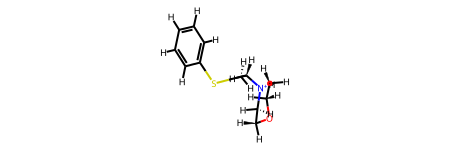

In [6]:
y

## Extra data

The dataset of the competition provides additional data you could use for the development of your model. You're free to use other publicly available data to develop your method.

In [7]:
# Get a single data point
datapoint = competition[0]

# See the data that's available
datapoint.keys()

dict_keys(['CXSMILES', 'Chain A Sequence', 'Chain B Sequence', 'Complex Structure', 'Ligand Pose', 'Protein Label', 'Protein Structure'])

### The data structures

Polaris hosts ML-ready datasets. You don't have to worry about loading domain-specific file formats, but can just start hacking right away.

For example, to get the 3D coordinates of the complex, you can simply do:

In [8]:
datapoint["Complex Structure"].coord

array([[ -2.395,   4.215, -17.097],
       [ -1.977,   5.504, -16.496],
       [ -2.341,   5.543, -15.01 ],
       ...,
       [ 21.061,  -8.835,   7.04 ],
       [ 22.269, -10.73 ,   6.01 ],
       [ 28.088, -10.911,   5.35 ]], dtype=float32)

Want to find the corresponding atom labels? You can do:

In [9]:
datapoint["Complex Structure"].atom_name

array(['N', 'CA', 'C', ..., 'H', 'H', 'H'], dtype='<U6')

What about the chain ids?

In [10]:
datapoint["Complex Structure"].chain_id

array(['A', 'A', 'A', ..., '', '', ''], dtype='<U4')

Polaris provides easy to use data structures for ML. In the case of this challenge, we specifically have two data types that are worth mentioning:
- The [Biotite](https://www.biotite-python.org/) `AtomArray`
- The [RDKit](https://www.rdkit.org/) `Chem.Mol`

In [11]:
type(datapoint["Complex Structure"]), type(datapoint["Protein Structure"])

(biotite.structure.AtomArray, biotite.structure.AtomArray)

In [12]:
type(datapoint["Ligand Pose"])

rdkit.Chem.rdchem.Mol

While this is convenient for many ML applications, you may prefer to use more traditional formats (e.g. as input to traditional docking tools). No problem!

In [13]:
import fastpdb
import datamol as dm

from tempfile import TemporaryDirectory
from pathlib import Path


with TemporaryDirectory() as tmpdir: 

    tmpdir = Path(tmpdir)
    
    # The RDKit Mol object supports various IO formats. 
    # Here we use the Datamol library (which wraps RDKit) to effortlessly write to SDF
    dm.to_sdf(datapoint["Ligand Pose"], tmpdir / "mol.sdf")

    # Similarly, the Biotite AtomArray also support various IO formats
    # Here we use fastpdb, a fast drop-in replacement for Biotite IO.
    out_file = fastpdb.PDBFile()
    out_file.set_structure(datapoint["Complex Structure"])
    out_file.write(tmpdir / "complex.pdb")

### Raw data dump
We've decided to sacrifice the completeness of the scientific data to improve its ease of use. For those that are interested, you can also access the raw data dump that this dataset has been created from.

In [14]:
import fsspec
import zipfile

with fsspec.open("https://fs.polarishub.io/2025-01-asap-discovery/raw_data_package.zip") as fd:
    with zipfile.ZipFile(fd, 'r') as zip_ref:
        zip_ref.extractall("./raw_data_package/")

In [15]:
path = Path("./raw_data_package") / "ligand-posing"
subdir = list(path.iterdir())[0]
subdir

PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-x0398_0A_CONFIDENTIAL')

In [16]:
list(subdir.iterdir())

[PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-x0398_0A_CONFIDENTIAL/protein.fasta'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-x0398_0A_CONFIDENTIAL/ligand.smi'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-x0398_0A_CONFIDENTIAL/ligand.sdf'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-x0398_0A_CONFIDENTIAL/complex.pdb'),
 PosixPath('raw_data_package/ligand-posing/SARS-CoV-2_Mpro-x0398_0A_CONFIDENTIAL/protein.pdb')]

# Build a model
Building a ligand pose prediction model is non trivial (e.g. see [Boltz-1](https://github.com/jwohlwend/boltz)) and outside the scope of this notebook.

# Prepare your inputs
Since building a ligand pose prediction model is out of scope, we'll simply generate a conformer using RDKit for the sake of simplicitly. This just serves as a way to show how to prepare your inputs for submission.

In [17]:
import datamol as dm
import numpy as np

from tqdm import tqdm

y_pred = []

for x in tqdm(test): 

    # Generate a random conformer
    mol = dm.to_mol(x["CXSMILES"])
    mol = dm.conformers.generate(mol, n_confs=1)

    # That's our prediction
    y_pred.append(mol)

100%|███████████████████████████████████████████████████████████████████████| 195/195 [00:11<00:00, 17.25it/s]


## Alignment

We will evaluate your predictions using RMSD between the predicted and actual pose. This raises a problem: You could have the perfect pose, but rotated, scaled, or translated. To allow for a fair comparison, everyone is therefore required to align their pose predictions ahead of submission with a reference structure that we provide.

Let's start by downloading the reference structures!


**WARNING:  UNLESS YOU CORRECTLYALIGN YOUR PREDICTIONS WILL NOT BE ABLE TO BE JUDGED CORRECTLY, PLEASE READ THE ALIGNMENT SECTIONS BELOW CAREFULLY**



In [18]:
import zipfile

with fsspec.open("https://fs.polarishub.io/2025-01-asap-discovery/ligand_poses_reference_structures.zip") as fd:
    with zipfile.ZipFile(fd, 'r') as zip_ref:
        zip_ref.extractall("./reference_structures/")

In [19]:
path = Path("./reference_structures")
list(path.iterdir())

[PosixPath('reference_structures/MERS-CoV-Mpro'),
 PosixPath('reference_structures/__MACOSX'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro')]

We provide more information than just the protein structure

In [20]:
list((path / "SARS-CoV-2-Mpro").iterdir())

[PosixPath('reference_structures/SARS-CoV-2-Mpro/.DS_Store'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/protein.fasta'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/ligand.smi'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/ligand.sdf'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/complex.pdb'),
 PosixPath('reference_structures/SARS-CoV-2-Mpro/protein.pdb')]

#### Dummy example
To show how to do the alignment, let's work through a dummy example by aligning the reference structure with a corrupted version of itself.

We will use PyMol. 

In [21]:
import pymol

# Let's reset! Just to be sure.
pymol.cmd.delete("all")

# Load the reference and mobile structure
ref_path = path / "SARS-CoV-2-Mpro" / "complex.pdb"
pymol.cmd.load(ref_path, "mobile")
pymol.cmd.load(ref_path, "reference")

# Corrupt the mobile protein
pymol.cmd.rotate("x", 90, selection="mobile")

# Compute the RMSD
pymol.cmd.rms_cur("mobile", "reference")

30.15460205078125

As expected, the alignment between the proteins is horrible!

In [22]:
# Now let's align our proteins again using PyMol
pymol.cmd.align(
    "polymer and name CA and mobile",
    "polymer and name CA and reference",
    quiet=0,
);

 Match: read scoring matrix.
 Match: assigning 603 x 603 pairwise scores.
 MatchAlign: aligning residues (603 vs 603)...
 MatchAlign: score 3245.000
 ExecutiveAlign: 603 atoms aligned.
 Executive: RMSD =    0.000 (603 to 603 atoms)


And the RMSD is 0 again!


## Alignment: Making it more concrete


We will now show an example of how to more concretely align your predictions to the reference structures. 

**IMPORTANT: you must submit your predictions in the same order that they are presented in the test set from polaris**

Additionally, As each example in the test set belongs to **either the SARS-CoV-2 Mpro or MERS-CoV Mpro** we need to make sure we align to the correct protein. 

**There are lots of ways to do this, here we present a method that has worked well for us (ASAP)** 

In [26]:
x0 = test[0]
print(x0["Protein Label"])

MERS-CoV Mpro


In [25]:
x2 = test[2]
print(x2["Protein Label"])

SARS-CoV-2 Mpro


Assuming we have PDB files of our predictions available on disk as `my_preds` (there are lots of ways to do this so please choose method appropriate for you)

In [23]:
# mockup 
my_preds = [f"path_to_preds/{i}" for i in range(len(test))]
protein_labels = [x["Protein Label"] for x in test]

You need to use the reference complexes available in the full data package to align to, edit these paths as required

In [34]:
import pymol
def align_pred(protein_path, protein_label, index):
    pymol.cmd.delete("all")
    if protein_label == 'MERS-CoV Mpro':
        tag = "MERS"
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/MERS-CoV-Mpro/reference_structure/complex.pdb"
    elif protein_label == "SARS-CoV-2 Mpro":
        tag = "SARS"
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/SARS-CoV-2-Mpro/reference_structure/complex.pdb"
    else:
        raise Exception
    pymol.cmd.load(protein_path, "mobile")
    pymol.cmd.load(ref_path, "reference")
    pymol.cmd.align(
        "chain A and mobile",
        "chain A and reference",
    )
    ret_path = f"my_preds_aligned_{index}.pdb"
    ret_path_pse = f"my_preds_aligned_{index}.pse"
    pymol.cmd.save(ret_path_pse)
    pymol.cmd.save(ret_path, "mobile")
    return ret_path

to then call this you would do something like 

In [ ]:
for i, (pred, label) in enumerate(zip(my_preds, protein_labels)):
    print(f"aligning index: {i}, pred: {pred}, label: {label}")
    aligned_path = align_pred(pred, label, i)

You can then inspect the aligned PDBs and saved pymol session files to see if the alignment looks good. **PLEASE CONFIRM THAT YOU ARE HAPPY WITH THE ALIGNMENT BEFORE SUBMITTING**

## Towards submission

## Serialize

We only judge the position of the ligand molecule. As such you need to either extract it or provide it as an rdkit mol already **after alignment to the reference structure

To submit to Polaris, you need to serialize the molecules to a bytestring. Please stick to the exact below example.

In [23]:
import base64
from rdkit import Chem


def serialize_rdkit_mol(mol: Chem.Mol): 
    props = Chem.PropertyPickleOptions.AllProps
    mol_bytes = mol.ToBinary(props)
    return base64.b64encode(mol_bytes).decode('ascii')  


y_pred_serialized = [serialize_rdkit_mol(mol) for mol in y_pred]

#### Sanity check
Let's deserialize the molecule again to make sure we've done this correctly

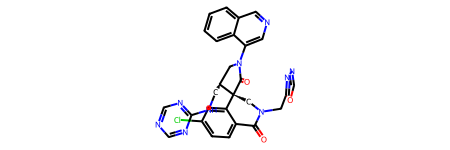

In [24]:
deserialized = Chem.Mol(base64.b64decode(y_pred_serialized[0].encode("ascii")))
deserialized

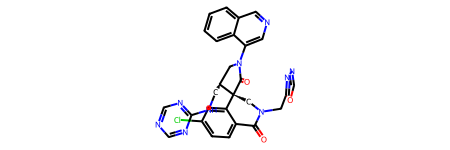

In [25]:
y_pred[0]

In [26]:
dm.same_mol(y_pred[0], deserialized)

True

# Submit to Polaris

In [28]:
competition.submit_predictions(
    predictions=y_pred_serialized,
    prediction_name="my-second-predictions",
    prediction_owner="cwognum",
    report_url="https://www.example.com", 
    # The below metadata is optional, but recommended.
    github_url="https://github.com/polaris-hub/polaris",
    description="Just testing the Polaris API here!",
    tags=["tutorial"],
    user_attributes={"Framework": "RDKit", "Method": "Dummy Baseline"}
)

✅ SUCCESS: Your competition predictions have been successfully uploaded to the Hub for evaluation.
 


For the ASAP competition, we will only evaluate your latest submission. 

The results will only be disclosed after the competition ends.

The End.